<a href="https://colab.research.google.com/github/MayaHayat/Machine_Learning_FinalProject/blob/main/Undersampling_Financial_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

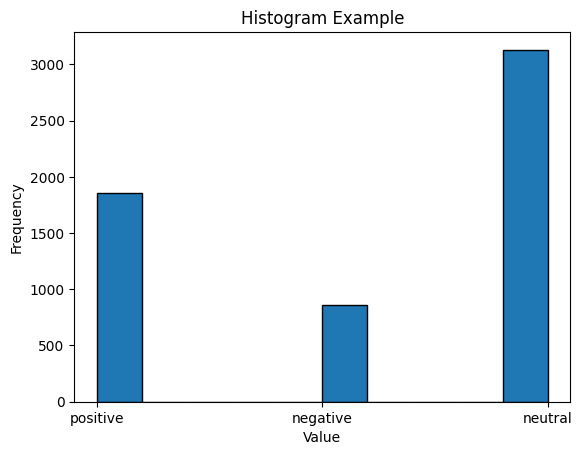

In [2]:
df = pd.read_csv('data.csv')
plt.hist(df['Sentiment'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

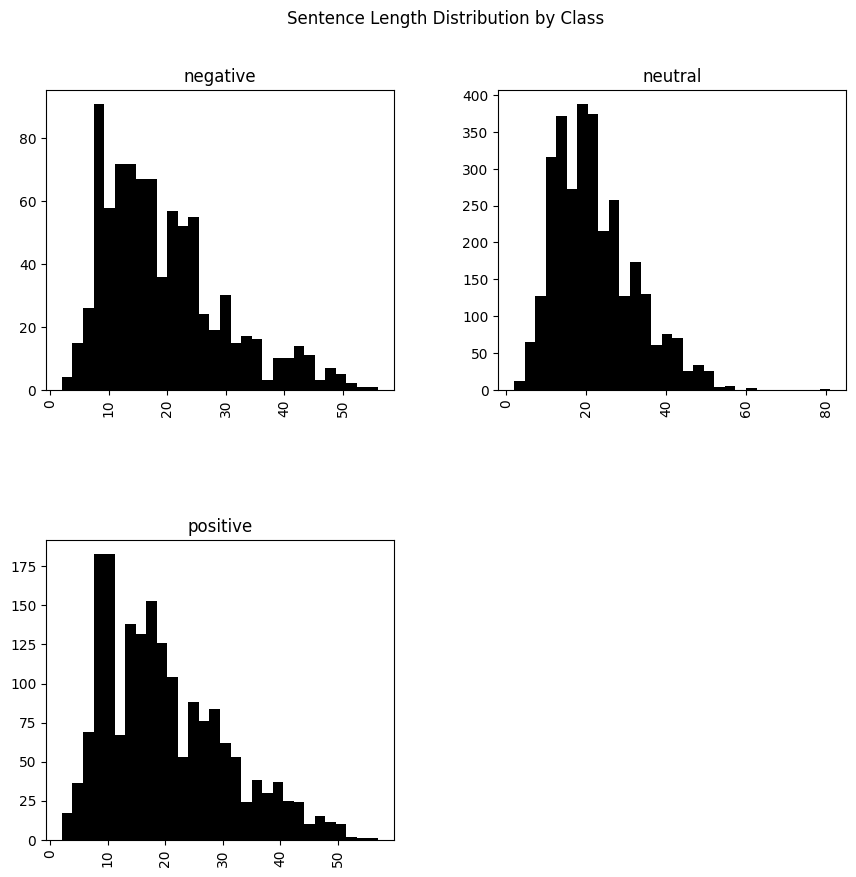

In [3]:
df['Sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
df['Sentence_length'].hist(by=df['Sentiment'], bins=30, figsize=(10, 10),color='black')
plt.suptitle('Sentence Length Distribution by Class')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

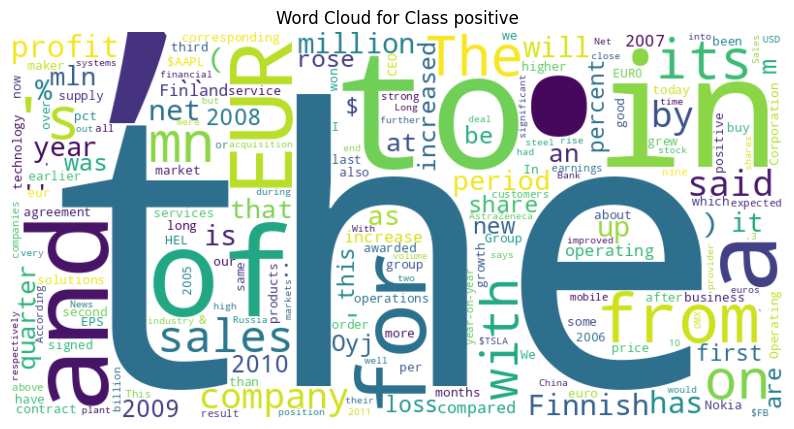

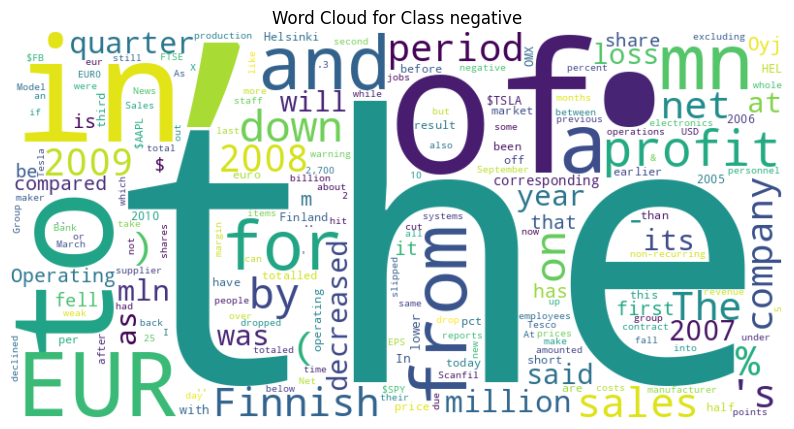

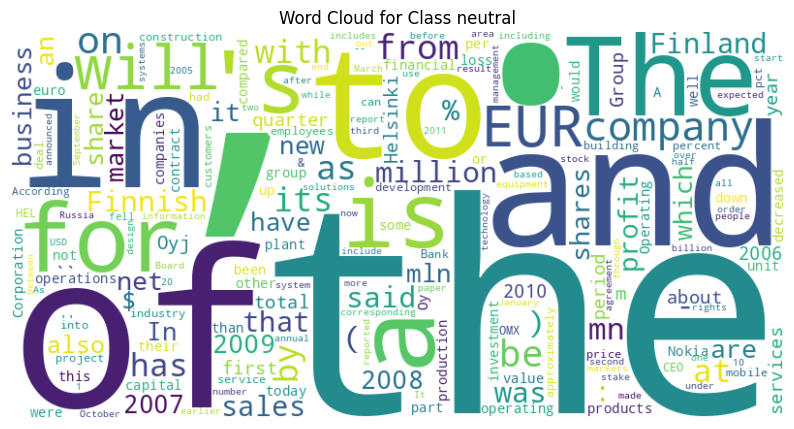

In [4]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

In [5]:
df.dropna(inplace=True) #Drop rows that contain null values just in case
df['Sentiment'] = df['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})
df

,Sentence,Sentiment,Sentence_length
0,The GeoSolutions technology will leverage Bene...,1,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,11
2,"For the last quarter of 2010 , Componenta 's n...",1,39
3,According to the Finnish-Russian Chamber of Co...,0,20
4,The Swedish buyout firm has sold its remaining...,0,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,-1,17
5838,Nordic Walking was first used as a summer trai...,0,14
5839,"According shipping company Viking Line , the E...",0,16
5840,"In the building and home improvement trade , s...",0,18


# Data Balancing

Upon examination, it is evident that the dataset exhibits significant class imbalance. Consequently, we have chose to use undersampling technique to address this issue.


**Cluster-Based Undersampling:**
* Cluster the majority class into several clusters.
* Randomly select one instance from each cluster to form the undersampled dataset.
* This preserves class diversity better than random undersampling.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume df is your DataFrame and has columns 'Sentence' and 'Sentiment'

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_transformed = vectorizer.fit_transform(X)

# Separate the data into classes
neutral_mask = y == 0
positive_mask = y == 1
negative_mask = y == -1

# Perform clustering on 'Neutral' class
neutral_kmeans = KMeans(n_clusters=1000, random_state=42, n_init='auto').fit(X_transformed[neutral_mask])
neutral_clusters = pd.Series(neutral_kmeans.labels_)

# Perform clustering on 'Positive' class
positive_kmeans = KMeans(n_clusters=1000, random_state=42, n_init='auto').fit(X_transformed[positive_mask])
positive_clusters = pd.Series(positive_kmeans.labels_)

# Sample one instance from each cluster
neutral_indices = neutral_clusters.groupby(neutral_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)
positive_indices = positive_clusters.groupby(positive_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)

# Create a new DataFrame with the undersampled data
neutral_undersampled_df = df[neutral_mask].iloc[neutral_indices]
positive_undersampled_df = df[positive_mask].iloc[positive_indices]
negative_df = df[negative_mask]

# Combine the undersampled data with the Negative data
undersampled_df = pd.concat([neutral_undersampled_df, positive_undersampled_df, negative_df])

# Reset index for the new DataFrame
undersampled_df.reset_index(drop=True, inplace=True)

# Shuffle the DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the undersampled DataFrame to a CSV file
undersampled_df.to_csv('undersampled_data.csv', index=False)

# Print the new undersampled DataFrame
undersampled_df


,Sentence,Sentiment,Sentence_length
0,Demand was brisk as expected and order levels ...,1,12
1,"In September 2010 , the Finnish group agreed t...",1,29
2,This organization will assume the responsibili...,0,11
3,"$CNP Sell Short Position on CNP,...Closed for ...",1,12
4,Finnish glass technology group Glaston Corpora...,0,39
...,...,...,...
2855,The solutions will be used for upgrading the n...,1,20
2856,"In Q1 of 2010 , Bank of +àland 's net interest...",1,22
2857,Growth is expected to continue in 2008 .,1,8
2858,South African Sappi will become the largest fo...,1,29


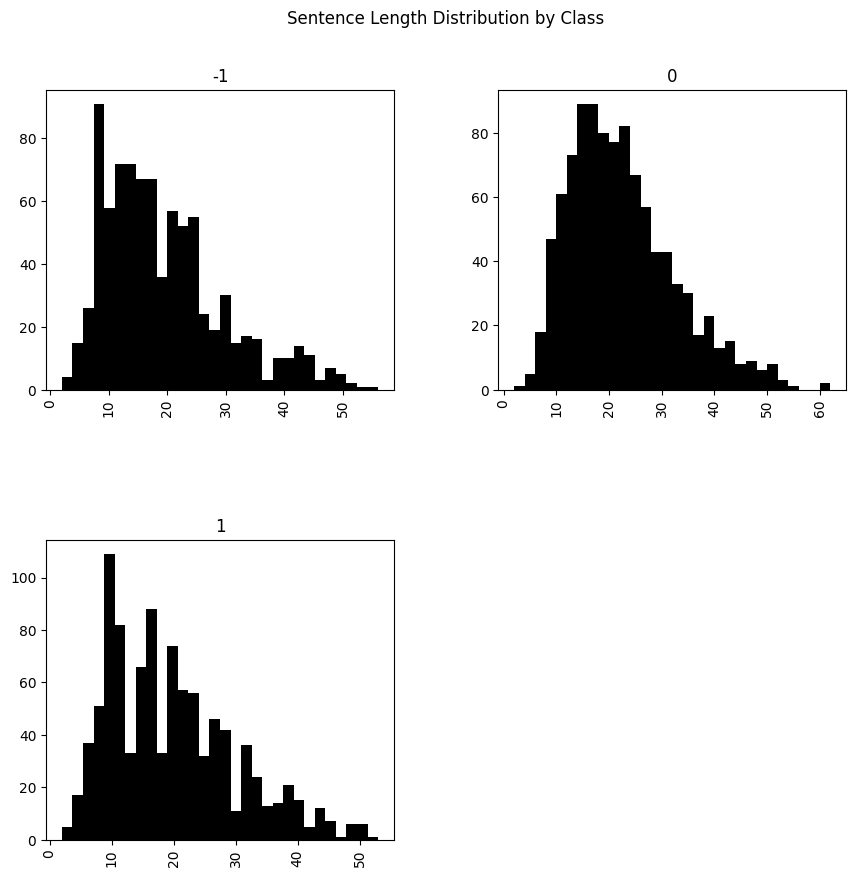

In [ ]:
undersampled_df['Sentence_length'] = undersampled_df['Sentence'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
undersampled_df['Sentence_length'].hist(by=undersampled_df['Sentiment'], bins=30, figsize=(10, 10),color='black')
plt.suptitle('Sentence Length Distribution by Class')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

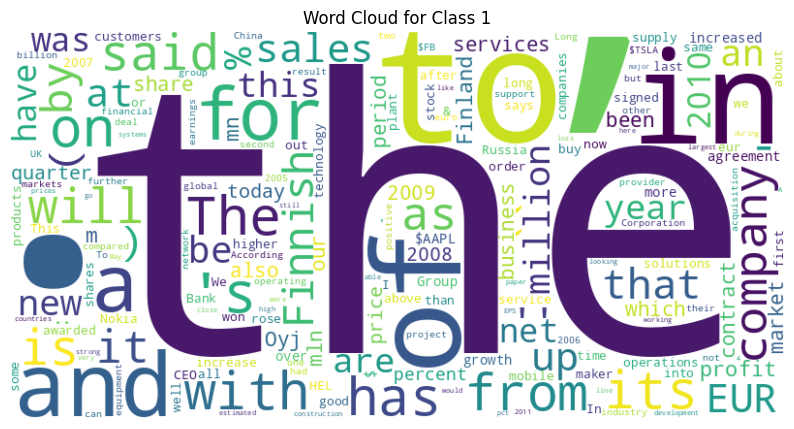

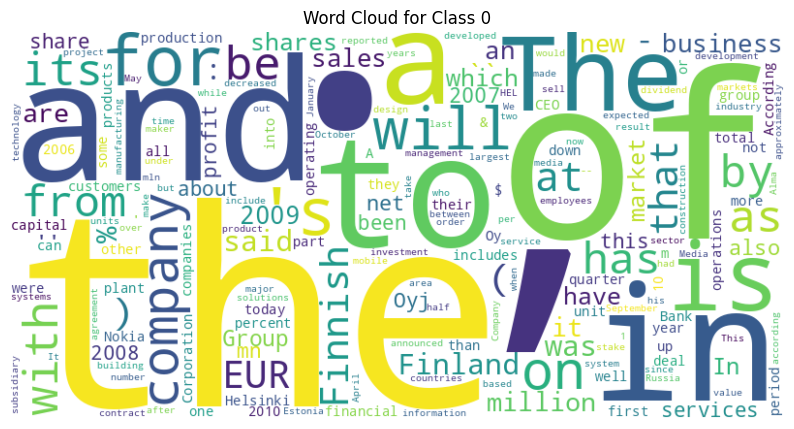

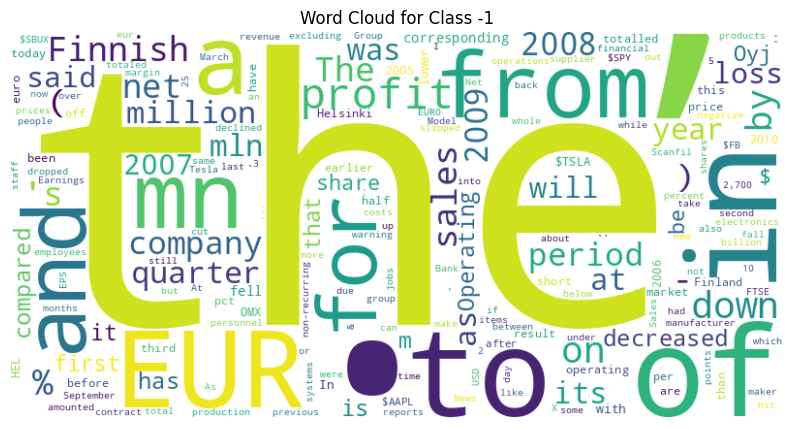

In [ ]:
for label in undersampled_df['Sentiment'].unique():
    words = ' '.join(undersampled_df[undersampled_df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

# Run Algorithms without preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = undersampled_df['Sentence']
y = undersampled_df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

## KNN

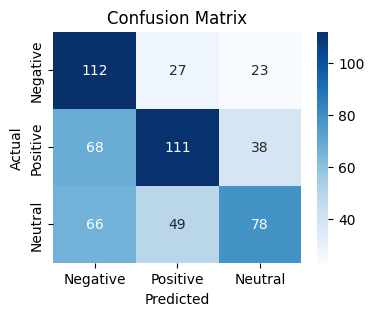

Accuracy: 0.5262237762237763
Classification Report:
               precision    recall  f1-score   support

          -1       0.46      0.69      0.55       162
           0       0.59      0.51      0.55       217
           1       0.56      0.40      0.47       193

    accuracy                           0.53       572
   macro avg       0.54      0.54      0.52       572
weighted avg       0.54      0.53      0.52       572



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train_transformed, y_train)


# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Decision Tree Classifier

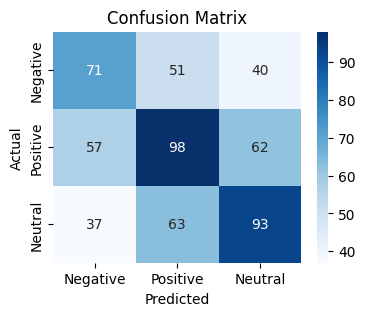

Accuracy: 0.458041958041958
Classification Report:
               precision    recall  f1-score   support

          -1       0.43      0.44      0.43       162
           0       0.46      0.45      0.46       217
           1       0.48      0.48      0.48       193

    accuracy                           0.46       572
   macro avg       0.46      0.46      0.46       572
weighted avg       0.46      0.46      0.46       572



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# SVM

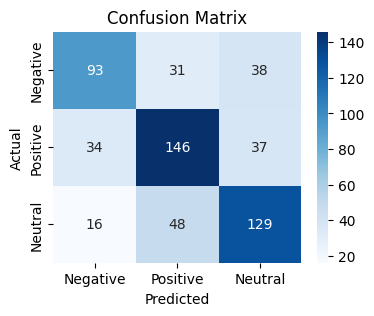

Accuracy: 0.6433566433566433
Classification Report:
               precision    recall  f1-score   support

          -1       0.65      0.57      0.61       162
           0       0.65      0.67      0.66       217
           1       0.63      0.67      0.65       193

    accuracy                           0.64       572
   macro avg       0.64      0.64      0.64       572
weighted avg       0.64      0.64      0.64       572



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Initialize SVM classifier
clf = SVC(kernel='linear', random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Logistic Regression

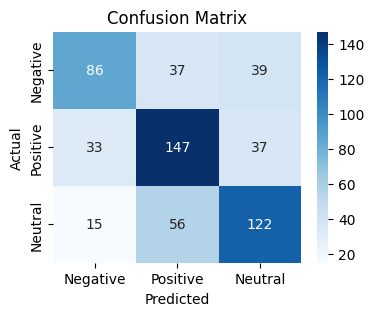

Accuracy: 0.6206293706293706
Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.53      0.58       162
           0       0.61      0.68      0.64       217
           1       0.62      0.63      0.62       193

    accuracy                           0.62       572
   macro avg       0.62      0.61      0.62       572
weighted avg       0.62      0.62      0.62       572



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
log_reg = LogisticRegression()

# Fit the classifier on the training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Cleaning the Data

In [6]:
df = pd.read_csv('undersampled_data.csv')
df

,Sentence,Sentiment,Sentence_length
0,Demand was brisk as expected and order levels ...,1,12
1,"In September 2010 , the Finnish group agreed t...",1,29
2,This organization will assume the responsibili...,0,11
3,"$CNP Sell Short Position on CNP,...Closed for ...",1,12
4,Finnish glass technology group Glaston Corpora...,0,39
...,...,...,...
2855,The solutions will be used for upgrading the n...,1,20
2856,"In Q1 of 2010 , Bank of +àland 's net interest...",1,22
2857,Growth is expected to continue in 2008 .,1,8
2858,South African Sappi will become the largest fo...,1,29


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


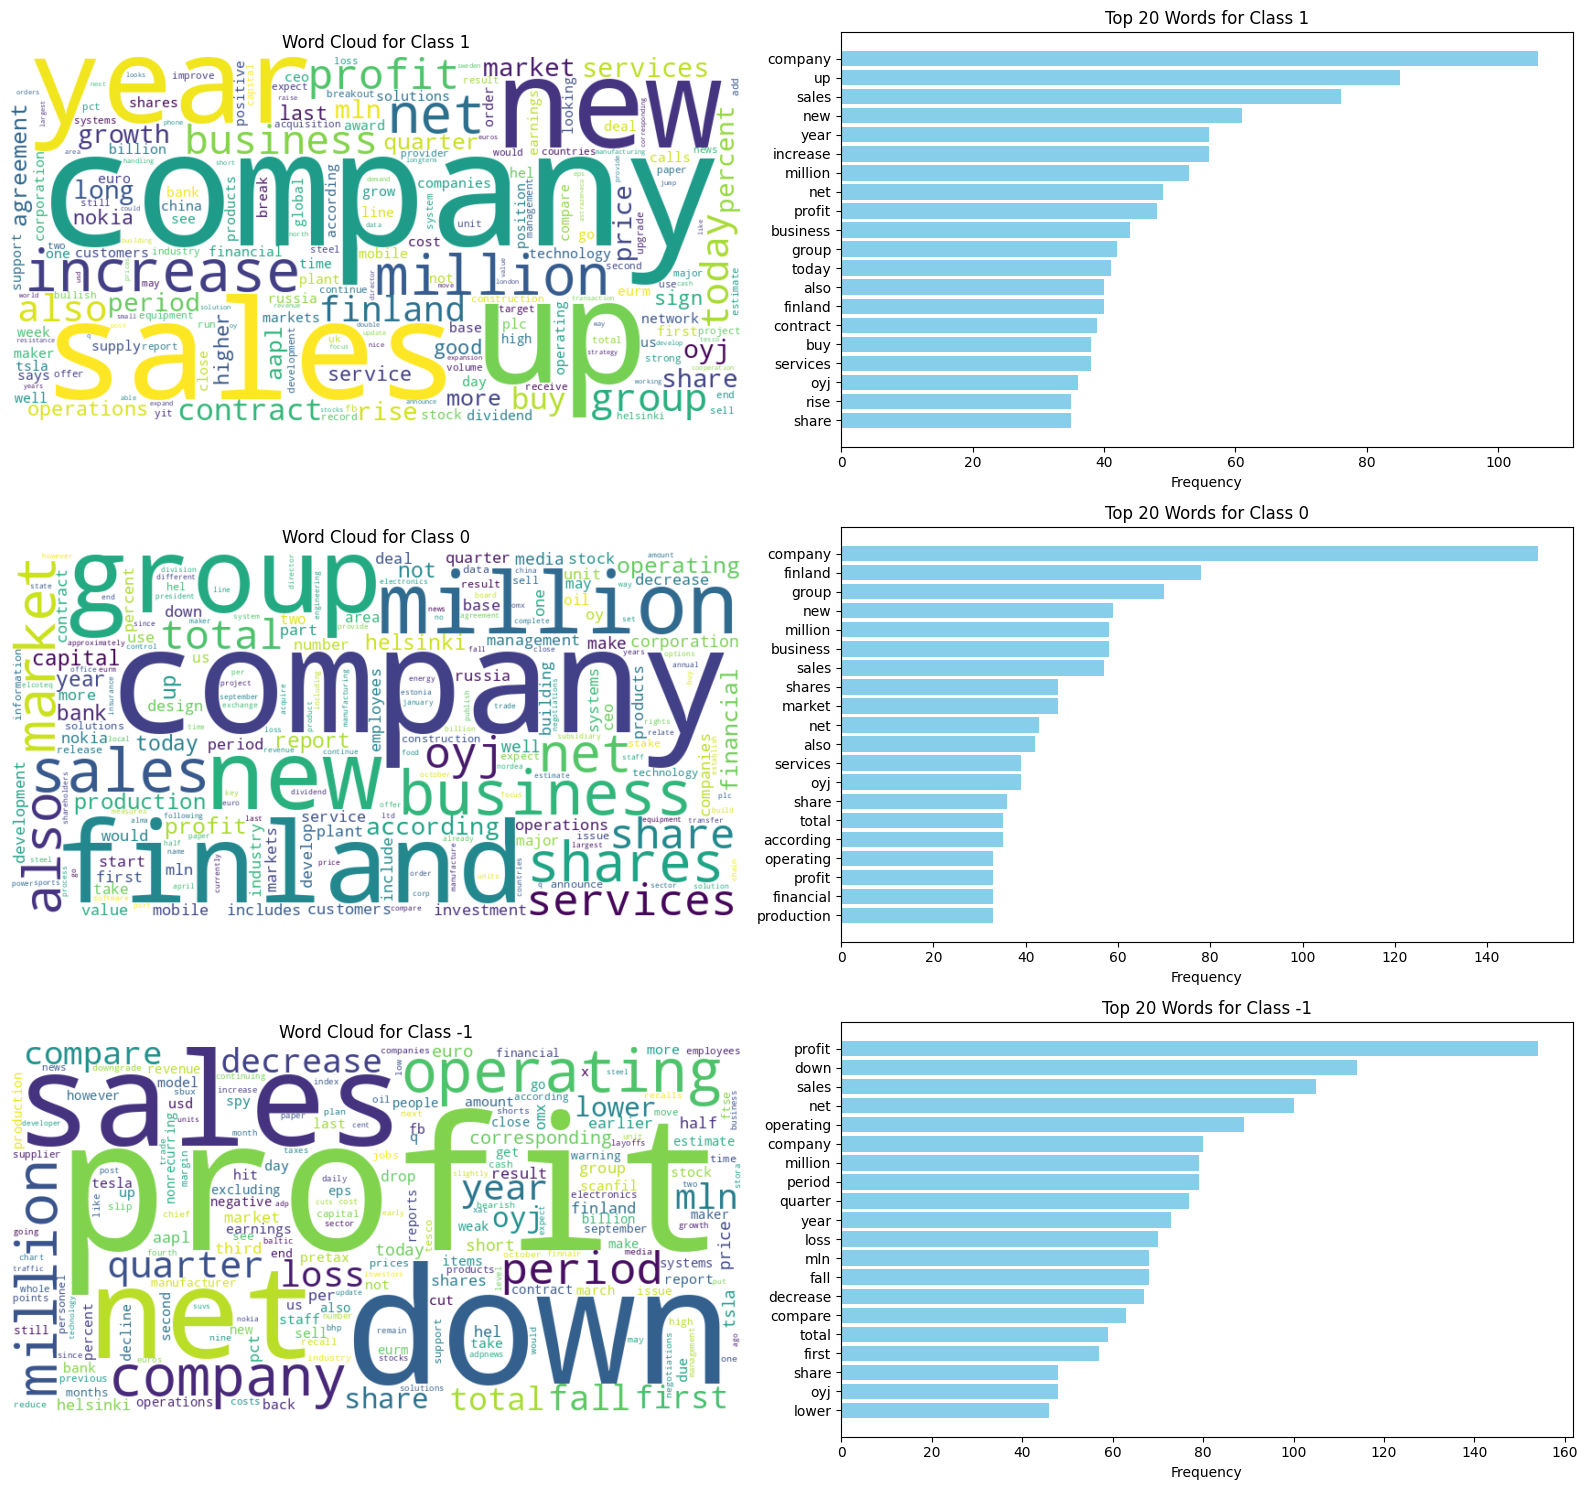

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and additional irrelevant words
exclude_words = {"up", "down", "few", "more", "no", "nor", "not"}
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn", '$', '%', 'eur', 'finlad', 'finnish', '(', ')'})
stop_words -= exclude_words

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_irrelevants(sentence):
    # Remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub('', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove non-alphabetic characters (optional)
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence

def preprocess_sentence(sentence):
    if isinstance(sentence, str):  # Only process strings
        sentence = remove_irrelevants(sentence)
        sentence = remove_stopwords(sentence)
        sentence = convert_past_to_present(sentence)  # Convert verbs to present tense
    return sentence

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_past_to_present(sentence):
    doc = nlp(sentence)
    present_sentence = []

    for token in doc:
        if token.pos_ == 'VERB':
            # Get the lemma (base form of the verb) which often is the present tense form
            lemma = token.lemma_
            if token.tag_ in ['VBD', 'VBN']:  # Past tense and past participle tags
                present_sentence.append(lemma)
            else:
                present_sentence.append(token.text)
        else:
            present_sentence.append(token.text)

    return " ".join(present_sentence)

# Assuming df is your DataFrame and it contains 'Sentence' and 'Sentiment' columns
df['Sentence'] = df['Sentence'].astype(str).apply(preprocess_sentence)

# Function to plot word cloud (you need to have wordcloud and matplotlib installed)
def plot_wordcloud(word_freq, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Function to plot top 20 words bar chart
def plot_top_words(word_freq, title, ax):
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    ax.barh(words, counts, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the most frequent words on top

# Number of unique sentiments
unique_labels = df['Sentiment'].unique()
num_labels = len(unique_labels)

# Create subplots: 2 columns (word clouds and bar charts) and as many rows as unique labels
fig, axes = plt.subplots(nrows=num_labels, ncols=2, figsize=(16, 5 * num_labels))

for idx, label in enumerate(unique_labels):
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)

    # Plot word cloud
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}', axes[idx, 0])

    # Plot top 20 words bar chart
    plot_top_words(word_freq, f'Top 20 Words for Class {label}', axes[idx, 1])

plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('cleaned_data_presentTense_Undersampled.csv', index=False)

# Splitting Dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
pd.DataFrame(X_train_transformed)

,0
0,"(0, 3998)\t0.32853838319586937\n (0, 5583)\..."
1,"(0, 2752)\t0.4083583224920692\n (0, 193)\t0..."
2,"(0, 1690)\t0.31395562853994635\n (0, 6622)\..."
3,"(0, 1147)\t0.32085093436965906\n (0, 1485)\..."
4,"(0, 4711)\t0.2986688377426824\n (0, 771)\t0..."
...,...
2283,"(0, 3989)\t0.3195309567469433\n (0, 6378)\t..."
2284,"(0, 274)\t0.3151045325591738\n (0, 5097)\t0..."
2285,"(0, 1564)\t0.4795824803681589\n (0, 6490)\t..."
2286,"(0, 793)\t0.418553176403152\n (0, 2680)\t0...."


# K-Nearest-Neighbors (KNN)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("canno

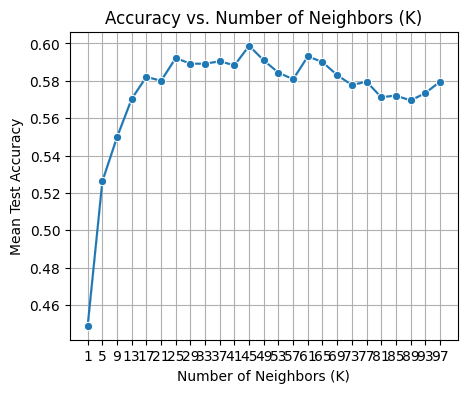

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Define the parameter grid for GridSearchCV with n_neighbors up to 100 in steps of 4
param_grid = {
    'n_neighbors': list(range(1, 101, 4)),  # Testing from 1 to 100 in steps of 4
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors']

# Plot accuracy vs. n_neighbors
plt.figure(figsize=(5, 4))
sns.lineplot(x=param_n_neighbors, y=mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.xticks(np.arange(min(param_n_neighbors), max(param_n_neighbors)+1, 4))  # Set x-ticks to match steps
plt.show()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already defined and loaded with 'Sentence' and 'Sentiment' columns
# df = pd.read_csv('your_data.csv')

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [43, 45, 47],  # Range of K values to test
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_k}, {best_algorithm}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("canno

Best Parameters: 45, auto
Best Cross-Validation Accuracy: 0.5988
Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.71      0.61       162
           0       0.64      0.57      0.60       217
           1       0.59      0.51      0.55       193

    accuracy                           0.59       572
   macro avg       0.59      0.60      0.59       572
weighted avg       0.60      0.59      0.59       572

Confusion Matrix:
 [[115  20  27]
 [ 52 123  42]
 [ 46  48  99]]


# Decision Tree Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 70, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 80}
Cross-validation results saved to cross_validation_results.csv
Accuracy: 0.5962
Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.59      0.61       162
           0       0.54      0.70      0.61       217
           1       0.65      0.49      0.56       193

    accuracy                           0.60       572
   macro avg       0.61      0.59      0.59       572
weighted avg       0.61      0.60      0.59       572



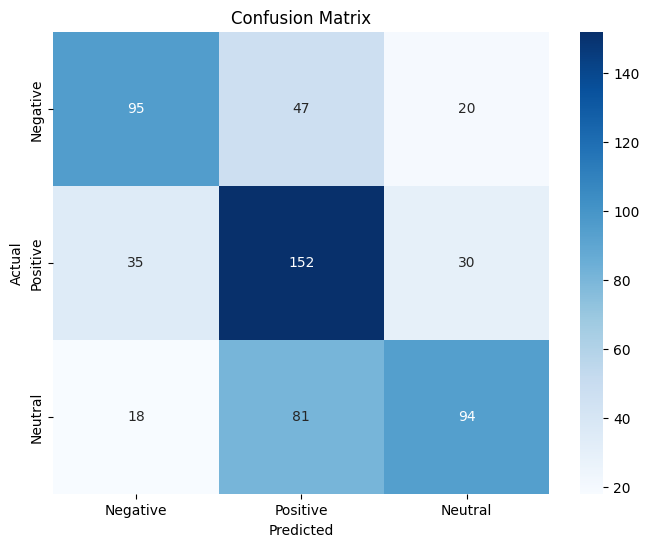

\All Examples:
Sentence: welcome
Actual Label: 0
Predicted Label: 0

Sentence: hand sawmills production decrease even more
Actual Label: 0
Predicted Label: -1

Sentence: componenta increase stake turkish steel company doktas dokumculuk ticaret sanayi pct stake march
Actual Label: 1
Predicted Label: 1

Sentence: cargotec kalmar business area providing container handling solutions award order ten eone rubbertyre gantry rtg cranes saigon newport company snp vietnam
Actual Label: 1
Predicted Label: 1

Sentence: efore decide establish company eletric vehicle ev business china
Actual Label: 0
Predicted Label: 0

Sentence: aviva fine million uk regulator fee failings
Actual Label: -1
Predicted Label: 0

Sentence: operating cash flow investments total compare corresponding period
Actual Label: 0
Predicted Label: -1

Sentence: astrazeneca buy zs pharma billion
Actual Label: 1
Predicted Label: 1

Sentence: ab inbev attacks sabmiller bid rebuffal
Actual Label: -1
Predicted Label: 1

Sentence: ins

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [20, 40, 60, 65, 70],
    'min_samples_split': [60, 65, 70, 75, 80],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the parameters of the best estimator
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_results = cross_val_score(best_clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Collect cross-validation results
cv_data = {
    'Fold': range(1, len(cv_results) + 1),
    'Accuracy': cv_results
}

# Convert to DataFrame
df_cv_results = pd.DataFrame(cv_data)

# Save to CSV
df_cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to cross_validation_results.csv")

# Make predictions on the test data
y_pred = best_clf.predict(X_test_transformed)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print and save misclassified examples to a CSV
misclassified_examples = []
misclassified_indices = [i for i in range(len(y_test))]
print("\All Examples:")
for i in misclassified_indices:
    example = {
        'Sentence': X_test.iloc[i],
        'Actual Label': y_test.iloc[i],
        'Predicted Label': y_pred[i]
    }
    misclassified_examples.append(example)
    print(f"Sentence: {X_test.iloc[i]}")
    print(f"Actual Label: {y_test.iloc[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print()

# Convert to DataFrame
df_misclassified = pd.DataFrame(misclassified_examples)

# Save to CSV
df_misclassified.to_csv('all_examples_cv.csv', index=False)
print("All examples saved to all_examples_cv.csv")


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Initialize and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_transformed, y_train)  # Use transformed features

# Evaluate the model
y_pred = svm_model.predict(X_test_transformed)  # Use transformed features for prediction
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.66      0.64      0.65       162
           0       0.61      0.59      0.60       217
           1       0.62      0.66      0.64       193

    accuracy                           0.63       572
   macro avg       0.63      0.63      0.63       572
weighted avg       0.63      0.63      0.63       572



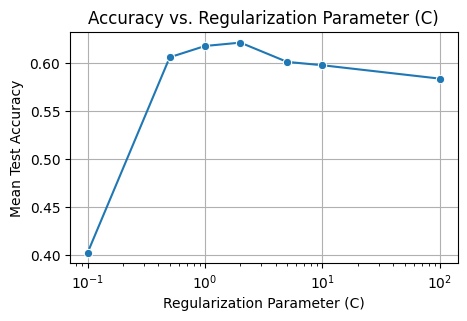

              precision    recall  f1-score   support

          -1       0.62      0.62      0.62       162
           0       0.63      0.61      0.62       217
           1       0.65      0.67      0.66       193

    accuracy                           0.64       572
   macro avg       0.64      0.64      0.64       572
weighted avg       0.64      0.64      0.64       572



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5, 10, 100],  # Regularization parameter
    'kernel': ['linear']  # Kernel type to use
}

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract the results into a DataFrame
results = grid_search.cv_results_

# Plot accuracy vs. regularization parameter (C)
plt.figure(figsize=(5, 3))
sns.lineplot(x=results['param_C'], y=results['mean_test_score'], marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.grid(True)
plt.show()

# Get the best estimator and evaluate it
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))


# Logistic Regression

Best Parameters: {'max_iter': 100}
Best Cross-Validation Accuracy: 0.6114
Classification Report:
               precision    recall  f1-score   support

          -1       0.66      0.59      0.62       162
           0       0.62      0.63      0.63       217
           1       0.61      0.65      0.63       193

    accuracy                           0.63       572
   macro avg       0.63      0.63      0.63       572
weighted avg       0.63      0.63      0.63       572



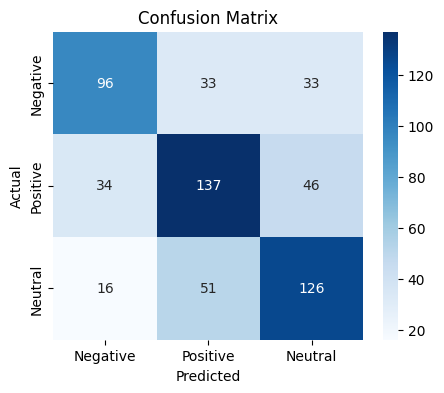

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is already defined and loaded with 'Sentence' and 'Sentiment' columns
# df = pd.read_csv('your_data.csv')

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = [
    {
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the corresponding accuracy

best_accuracy = grid_search.best_score_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Conclusion